In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns


In [2]:
import statsmodels.api as sm

In [3]:
data= pd.read_excel("duzenlenmis_veri2.xlsx")

In [4]:
data.head()

,Cinsiyetiniz Nedir?,Anne Eğitim Düzeyi Nedir?,Baba Eğitim Düzeyi Nedir?\n,Aylık Ortalama Harcamanız Ne Kadar? (Sadece Sayı Giriniz),Burs veya kredi alıyor musunuz?,Nerede kalıyorsunuz?,Sigara Kullanıyor Musunuz?,Alkol Kullanıyor Musunuz?,Kitap Okuma Alışkanlığınız Var Mı?,Son bir ayda okuduğunuz kitap sayısı Nedir? (Sadece Sayı Giriniz),Spor yapıyor musunuz?,Günlük kaç adım atarsınız?,GANO Ortalamanız Ne Kadar?,Alttan aldığınız ders sayısı ne kadar?,Aileniz hangi bölgede yaşıyor?,Eğlence Ve Sosyal Aktivitelere Hangi Sıklıkta Katılırsınız? Lütfen 0-5 arası derecelendiriniz,Hangi Tabanlı Fakültede Eğitim Görmektesiniz?,Okula ulaşımı nasıl sağlıyorsunuz?,Okulda yeme içme ihtiyacınızı nereden karşılıyorsunuz?
0,1,1,1,3000.0,1,1,2,2,2,1,1,3,3.59,0,1,3,1,1,1
1,1,1,1,2000.0,2,2,2,2,2,0,2,2,2.85,3,1,2,1,2,1
2,1,2,2,8000.0,2,2,2,2,1,2,1,3,3.06,1,2,2,1,3,1
3,2,1,1,4000.0,1,1,1,2,1,1,2,3,3.23,0,5,2,1,1,1
4,1,1,1,9687.5,1,1,2,2,2,2,1,1,3.31,0,2,4,1,3,2


In [5]:
data.columns

Index(['Cinsiyetiniz Nedir?', 'Anne Eğitim Düzeyi Nedir?',
       'Baba Eğitim Düzeyi Nedir?\n',
       'Aylık Ortalama Harcamanız Ne Kadar? (Sadece Sayı Giriniz)',
       'Burs veya kredi alıyor musunuz?', 'Nerede kalıyorsunuz?',
       'Sigara Kullanıyor Musunuz?', 'Alkol Kullanıyor Musunuz?',
       'Kitap Okuma Alışkanlığınız Var Mı?',
       'Son bir ayda okuduğunuz kitap sayısı Nedir? (Sadece Sayı Giriniz)',
       'Spor yapıyor musunuz?', 'Günlük kaç adım atarsınız?',
       'GANO Ortalamanız Ne Kadar? ', 'Alttan aldığınız ders sayısı ne kadar?',
       'Aileniz hangi bölgede yaşıyor?',
       'Eğlence Ve Sosyal Aktivitelere Hangi Sıklıkta Katılırsınız? Lütfen 0-5 arası derecelendiriniz',
       'Hangi Tabanlı Fakültede Eğitim Görmektesiniz?',
       'Okula ulaşımı nasıl sağlıyorsunuz?',
       'Okulda yeme içme ihtiyacınızı nereden karşılıyorsunuz?'],
      dtype='object')

In [6]:
data=data.dropna()


In [90]:
vif_data = pd.DataFrame()
vif_data['Variable'] = data.columns
vif_data['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]

print(vif_data)

                                             Variable        VIF
0                                 Cinsiyetiniz Nedir?  15.142803
1                           Anne Eğitim Düzeyi Nedir?   6.085790
2                         Baba Eğitim Düzeyi Nedir?\n   6.864452
3   Aylık Ortalama Harcamanız Ne Kadar? (Sadece Sa...   4.785712
4                     Burs veya kredi alıyor musunuz?   9.772154
5                                Nerede kalıyorsunuz?   6.868669
6                          Sigara Kullanıyor Musunuz?  21.876004
7                           Alkol Kullanıyor Musunuz?  24.679984
8                               Spor yapıyor musunuz?  12.119061
9                          Günlük kaç adım atarsınız?  10.404181
10             Alttan aldığınız ders sayısı ne kadar?   1.563256
11                     Aileniz hangi bölgede yaşıyor?   3.074608
12  Eğlence Ve Sosyal Aktivitelere Hangi Sıklıkta ...   5.536933
13      Hangi Tabanlı Fakültede Eğitim Görmektesiniz?   4.041703


In [91]:
x = data.drop(["Kitap Okuma Alışkanlığınız Var Mı?",
               'Okula ulaşımı nasıl sağlıyorsunuz?', 'GANO Ortalamanız Ne Kadar? ',
               'Okulda yeme içme ihtiyacınızı nereden karşılıyorsunuz?', 
               'Son bir ayda okuduğunuz kitap sayısı Nedir? (Sadece Sayı Giriniz)'], axis=1)

y = np.array(data["Kitap Okuma Alışkanlığınız Var Mı?"])


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, PoissonRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)


models = {
    'Linear Regression (OLS)': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet Regression': ElasticNet(),
    'Poisson Regression': PoissonRegressor(),
}


models['Polynomial Regression'] = LinearRegression()


model_performance = {}


for model_name, model in models.items():
    if model_name == 'Polynomial Regression':
        model.fit(X_train_poly, y_train)  
        y_pred = model.predict(X_test_poly)
    else:
        model.fit(X_train_scaled, y_train)  
        y_pred = model.predict(X_test_scaled)
    
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    

    model_performance[model_name] = {'R2': r2, 'MSE': mse}


best_model_name = min(model_performance, key=lambda x: model_performance[x]['MSE'])
best_model = models[best_model_name]


print(f"En iyi model: {best_model_name}")
print(f"Model Performansı: R² = {model_performance[best_model_name]['R2']}, MSE = {model_performance[best_model_name]['MSE']}")


best_model.fit(X_train_scaled, y_train) if best_model_name != 'Polynomial Regression' else best_model.fit(X_train_poly, y_train)
y_pred_best = best_model.predict(X_test_scaled) if best_model_name != 'Polynomial Regression' else best_model.predict(X_test_poly)


print(f"En iyi modelin test setindeki tahminleri: {y_pred_best[:5]}")

En iyi model: Poisson Regression
Model Performansı: R² = 0.01039316365939602, MSE = 0.24367050448522107
En iyi modelin test setindeki tahminleri: [1.41230998 1.31399203 1.29848566 1.47338447 1.38283478]


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

x = sm.add_constant(x)


ols_model = sm.OLS(y, x).fit()
print("OLS Model Özeti:")
print(ols_model.summary())


poisson_model = sm.GLM(y, x, family=sm.families.Poisson()).fit()
print("\nPoisson Model Özeti:")
print(poisson_model.summary())


scaler = StandardScaler()
x_scaled = scaler.fit_transform(x.iloc[:, 1:])

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(x_scaled, y)
ridge_pred = ridge_model.predict(x_scaled)
ridge_mse = mean_squared_error(y, ridge_pred)

print("\nRidge Model Katsayıları:")
print(ridge_model.coef_)

print(f"Ridge Model MSE: {ridge_mse}")


models = {
    "OLS": ols_model,
    "Poisson": poisson_model,
    "Ridge": ridge_mse
}


best_model = min(models, key=lambda model: models[model] if isinstance(models[model], float) else np.nan)
print(f"\nEn iyi model: {best_model}")

OLS Model Özeti:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     2.327
Date:                Mon, 18 Nov 2024   Prob (F-statistic):            0.00484
Time:                        23:19:42   Log-Likelihood:                -184.50
No. Observations:                 283   AIC:                             399.0
Df Residuals:                     268   BIC:                             453.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                                                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [ ]:
model = sm.OLS(y, x).fit()


print(model.summary())  


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     2.327
Date:                Mon, 18 Nov 2024   Prob (F-statistic):            0.00484
Time:                        23:19:47   Log-Likelihood:                -184.50
No. Observations:                 283   AIC:                             399.0
Df Residuals:                     268   BIC:                             453.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

In [99]:
x = data.drop(["Kitap Okuma Alışkanlığınız Var Mı?"], axis=1)

y = np.array(data["Kitap Okuma Alışkanlığınız Var Mı?"])


In [100]:
x=x.dropna()

In [103]:
x

,Cinsiyetiniz Nedir?,Anne Eğitim Düzeyi Nedir?,Baba Eğitim Düzeyi Nedir?\n,Aylık Ortalama Harcamanız Ne Kadar? (Sadece Sayı Giriniz),Burs veya kredi alıyor musunuz?,Nerede kalıyorsunuz?,Sigara Kullanıyor Musunuz?,Alkol Kullanıyor Musunuz?,Son bir ayda okuduğunuz kitap sayısı Nedir? (Sadece Sayı Giriniz),Spor yapıyor musunuz?,Günlük kaç adım atarsınız?,GANO Ortalamanız Ne Kadar?,Alttan aldığınız ders sayısı ne kadar?,Aileniz hangi bölgede yaşıyor?,Eğlence Ve Sosyal Aktivitelere Hangi Sıklıkta Katılırsınız? Lütfen 0-5 arası derecelendiriniz,Hangi Tabanlı Fakültede Eğitim Görmektesiniz?,Okula ulaşımı nasıl sağlıyorsunuz?,Okulda yeme içme ihtiyacınızı nereden karşılıyorsunuz?
0,1,1,1,3000.0,1,1,2,2,1,1,3,3.59,0,1,3,1,1,1
1,1,1,1,2000.0,2,2,2,2,0,2,2,2.85,3,1,2,1,2,1
2,1,2,2,8000.0,2,2,2,2,2,1,3,3.06,1,2,2,1,3,1
3,2,1,1,4000.0,1,1,1,2,1,2,3,3.23,0,5,2,1,1,1
4,1,1,1,9687.5,1,1,2,2,2,1,1,3.31,0,2,4,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,2,1,3,4000.0,1,2,2,2,1,2,2,2.96,0,5,2,5,1,1
322,2,1,1,7000.0,1,1,2,2,2,2,2,2.70,0,4,0,5,1,1
323,2,2,3,2000.0,1,2,2,2,2,2,2,3.50,0,1,3,5,1,1
324,2,3,3,4000.0,2,2,2,2,3,2,2,2.70,1,1,2,3,1,1


In [116]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                    test_size=0.33, 
                                                    random_state=42)
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(xtrain, ytrain)

RandomForestClassifier()

In [117]:
from sklearn.metrics import accuracy_score
y_predrf = rf_model.predict(xtest)
accuracy_score(ytest, y_predrf)
# ilkel test hatası        

0.776595744680851

In [118]:
from sklearn.metrics import confusion_matrix


# Random Forest için karmaşıklık matrisi
cm_rf = confusion_matrix(ytest, y_predrf)

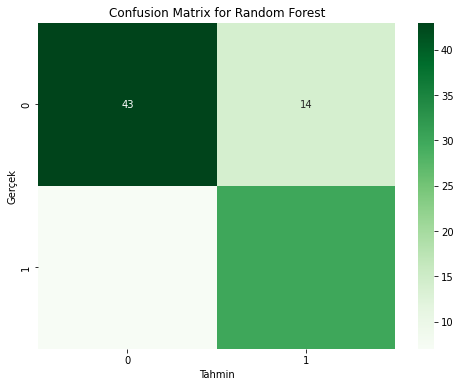

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt


# Random Forest karmaşıklık matrisi için sıcaklık haritası
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Tahmin')
plt.ylabel('Gerçek')
plt.show()

In [120]:
def kitap_okuma_tahmini(model):
    # Kullanıcıdan giriş al
    cinsiyet = int(input("Cinsiyet (1: Erkek, 2: Kadın): "))
    anne_egitim = int(input("Anne Eğitim Düzeyi (1:ilköğretim 2:lise 3:üniversite 4:yüksek lisans ve üzeri): "))
    baba_egitim = int(input("Baba Eğitim Düzeyi (1:ilköğretim 2:lise 3:üniversite 4:yüksek lisans ve üzeri): "))
    harcama = float(input("Aylık Ortalama Harcama: "))
    burs = int(input("Burs veya Kredi Alıyor Musunuz? (1: Evet, 2: Hayır): "))
    yasam_yeri = int(input("Nerede Kalıyorsunuz? (1: Yurt, 2: Ev aile ile, 3: ev arkadaşlar ile): "))
    sigara = int(input("Sigara Kullanıyor Musunuz? (1: Evet, 2: Hayır): "))
    alkol = int(input("Alkol Kullanıyor Musunuz? (1: Evet, 2: Hayır): "))
    okunan_kitap=int(input("Son Bir Ayda Okuduğunuz Kitap Sayısı: "))
    spor = int(input("Spor Yapıyor Musunuz? (1: Evet, 2: Hayır): "))
    adim = int(input("Günlük Kaç Adım Atıyorsunuz? (1: 0-5000 adım 2: 5000-10000 adım 3: 10000 ve üzeri) : "))
    gano = float(input("GANO Ortalamanız Nedir?: "))
    alttan_ders = int(input("Alttan Aldığınız Ders Sayısı Nedir?: "))
    aile_bolge = int(input("Aileniz Hangi Bölgede Yaşıyor? 1: İç Anadolu 2:Akdeniz 3:Karadeniz 4:Marmara 5: ege 6:Doğu Anadolu 7:Güney Doğu Anadolu): "))
    sosyal_aktivite = int(input("Sosyal Aktivitelere Katılım (0-5 arası derecelendiriniz): "))
    fakulte = int(input("Fakülteniz (1:Mühendislik Ve Fen Bilimleri 2:Eğitim 3:Edebiyat 4:İktisadi Ve İdari Bilimler 5:Sağlık 6:Güzel Sanatlar): "))
    ulasim = int(input("Okula Ulaşım Nasıl Sağlanıyor? (1: Toplu Taşıma, 2: kişisel araç, 3: yürüyerekr): "))
    yemek = int(input("Okulda Yeme İçme İhtiyacınızı Nereden Karşılıyorsunuz? (1:Üniversite/Fakülte Yemekhanesi 2:Hazır Yemekler 3:Evden Getiriyorum): "))

    # Tüm girişleri bir listeye koy
    input_data = [[cinsiyet, anne_egitim, baba_egitim, harcama, burs, yasam_yeri, sigara, alkol,okunan_kitap, spor, adim, gano, alttan_ders, aile_bolge, sosyal_aktivite, fakulte, ulasim, yemek]]
    
    # Tahmin yap
    prediction = model.predict(input_data)
    
    # Tahmin sonucunu döndür
    return 'Kitap okuma alışkanlığı var' if prediction[0] == 1 else 'Kitap okuma alışkanlığı yok'



In [121]:
# Eğitilmiş model ile tahmin yapmak
tahmin = kitap_okuma_tahmini(rf_model)
print(tahmin)


Kitap okuma alışkanlığı yok


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
